In [69]:
import os
import pathlib

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(42)

from PIL import Image, ImageOps
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report


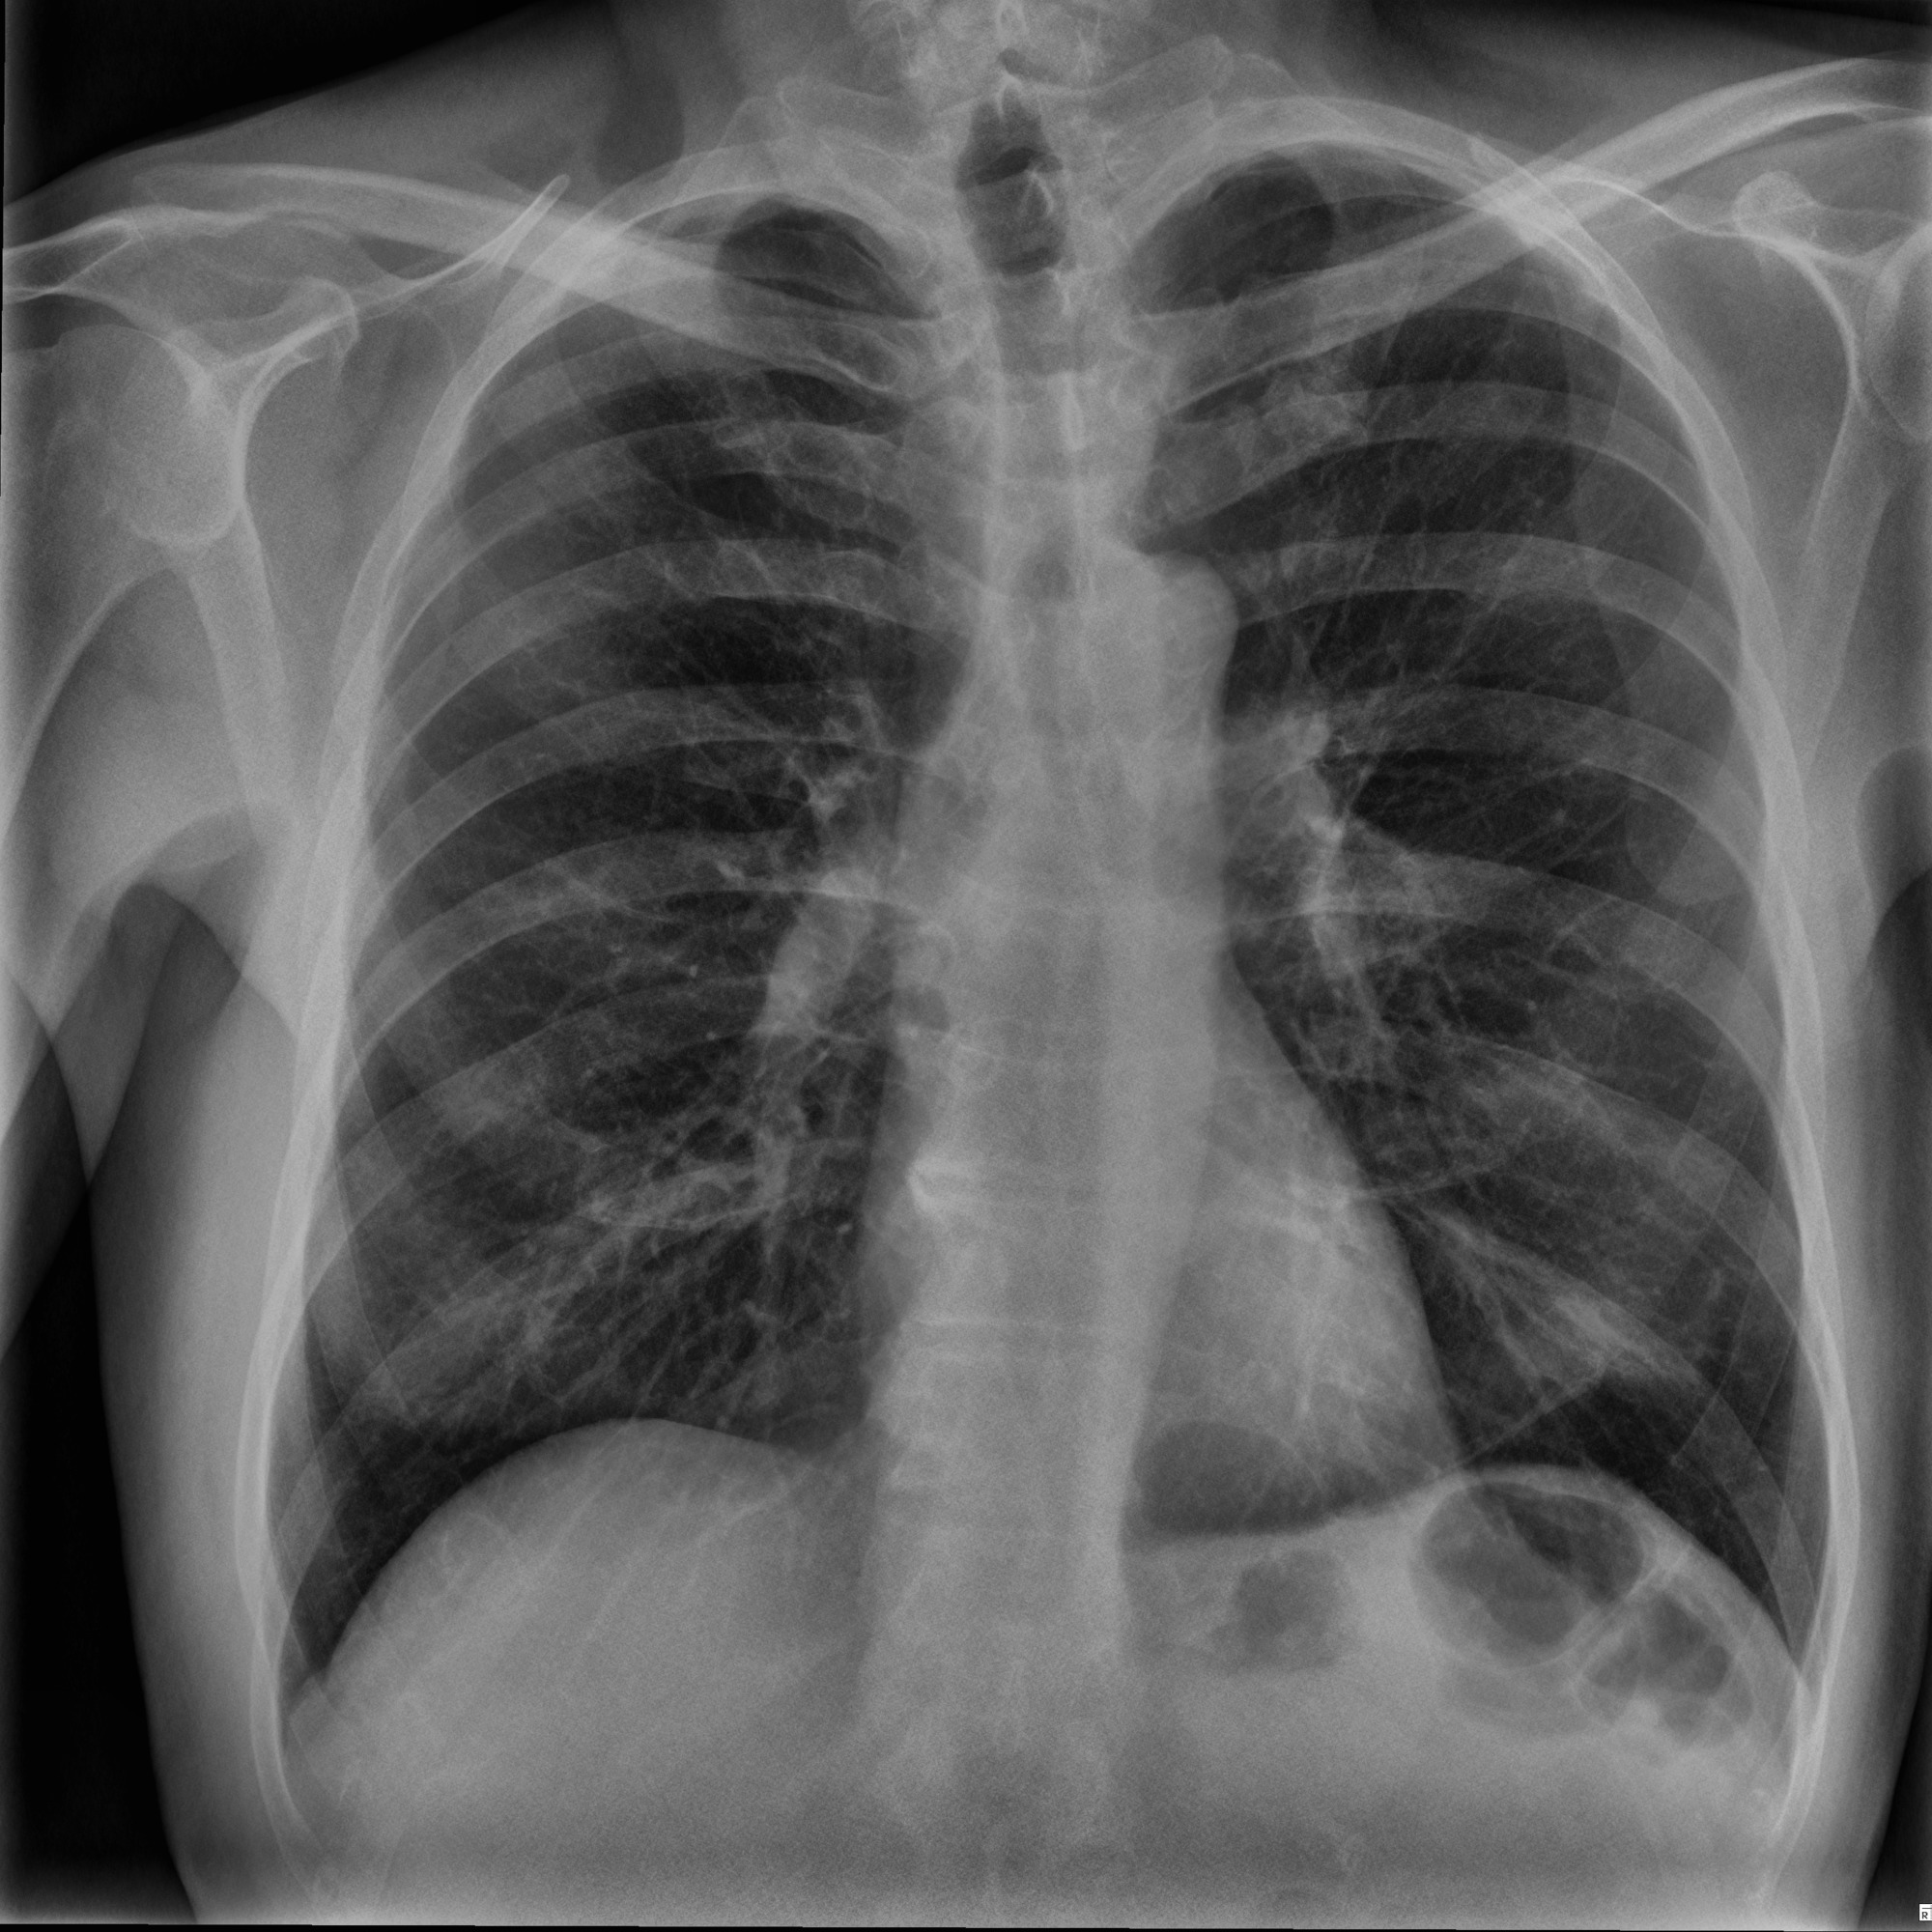

In [58]:
img1 = Image.open('feedData/train/0/390_1676586_image.png')
display(img1)

In [25]:
np.array(img1).shape

(2000, 2000)

In [59]:
np.array(img1) / 255.0

array([[0.00392157, 0.01568627, 0.01176471, ..., 0.16470588, 0.16470588,
        0.16862745],
       [0.01176471, 0.01960784, 0.00784314, ..., 0.14901961, 0.15294118,
        0.15686275],
       [0.01568627, 0.01568627, 0.00392157, ..., 0.13333333, 0.1372549 ,
        0.14901961],
       ...,
       [0.01176471, 0.01176471, 0.01176471, ..., 0.45882353, 0.4745098 ,
        0.4745098 ],
       [0.01176471, 0.01176471, 0.01176471, ..., 0.4627451 , 0.48235294,
        0.49019608],
       [0.01176471, 0.01176471, 0.01176471, ..., 0.16862745, 0.18039216,
        0.19215686]])

In [60]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

In [61]:
valid_data = valid_datagen.flow_from_directory(
    directory='feedData/validation/',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=64,
    seed=42
)
train_data = train_datagen.flow_from_directory(
    directory='feedData/train/',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=64,
    seed=42
)


Found 623 images belonging to 3 classes.
Found 5611 images belonging to 3 classes.


In [13]:
'''
#skip unless needed
first_batch = train_data.next()
def visualize_batch(batch):
    n = 64
    num_row, num_col = 8, 8
    fig, axes = plt.subplots(num_row, num_col, figsize=(3 * num_col, 3 * num_row))
    
    for i in range(n):
        img = np.array(batch[0][i] * 255, dtype='uint8')
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
        
    plt.tight_layout()
    plt.show()
visualize_batch(batch=first_batch)
'''

In [62]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(256, 256, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')]
)

history = model.fit(
    train_data,
    steps_per_epoch=10,
    validation_data=valid_data,
    epochs=100
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 10 steps
Epoch 1/100
10/10 [==============================] - 56s 6s/step - loss: 3.0285 - accuracy: 0.4187 - val_loss: 0.9609 - val_accuracy: 0.5907
Epoch 2/100
10/10 [==============================] - 56s 6s/step - loss: 0.8445 - accuracy: 0.6219 - val_loss: 0.7025 - val_accuracy: 0.6645
Epoch 3/100
10/10 [==============================] - 56s 6s/step - loss: 0.7131 - accuracy: 0.6875 - val_loss: 0.6274 - val_accuracy: 0.7576
Epoch 4/100
10/10 [==============================] - 56s 6s/step - loss: 0.5626 - accuracy: 0.7609 - val_loss: 0.5995 - val_accuracy: 0.7544
Epoch 5/100
10/10 [==============================] - 56s 6s/step - loss: 0.6290 - accuracy: 0.7484 - val_loss: 0.6655 - val_accuracy: 0.7239
Epoch 6/100
10/10 [==============================] - 54s 5s/step - loss: 0.5779 - accuracy: 0.7803 - val_loss: 0.6001 - val_accuracy: 0.7689
Epoch 7/100
10/10 [==============================] - 57s 6s/st

10/10 [==============================] - 54s 5s/step - loss: 0.2450 - accuracy: 0.8969 - val_loss: 0.6417 - val_accuracy: 0.7801
Epoch 58/100
10/10 [==============================] - 57s 6s/step - loss: 0.1677 - accuracy: 0.9531 - val_loss: 0.6532 - val_accuracy: 0.7945
Epoch 59/100
10/10 [==============================] - 55s 6s/step - loss: 0.2250 - accuracy: 0.9141 - val_loss: 0.6500 - val_accuracy: 0.7929
Epoch 60/100
10/10 [==============================] - 56s 6s/step - loss: 0.1507 - accuracy: 0.9422 - val_loss: 0.6726 - val_accuracy: 0.7961
Epoch 61/100
10/10 [==============================] - 56s 6s/step - loss: 0.1893 - accuracy: 0.9187 - val_loss: 0.7026 - val_accuracy: 0.7913
Epoch 62/100
10/10 [==============================] - 54s 5s/step - loss: 0.1889 - accuracy: 0.9281 - val_loss: 0.6946 - val_accuracy: 0.7881
Epoch 63/100
10/10 [==============================] - 56s 6s/step - loss: 0.1867 - accuracy: 0.9312 - val_loss: 0.6892 - val_accuracy: 0.8234
Epoch 64/100
10/10 

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [64]:
valid_data = valid_datagen.flow_from_directory(
    directory='feedData/validation/',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

Found 623 images belonging to 3 classes.


In [65]:
# Create lists for storing the predictions and labels
predictions = []
labels = []

# Get the total number of labels in generator 
# (i.e. the length of the dataset where the generator generates batches from)
n = len(valid_data.labels)
print(n)

# Loop over the generator
for data, label in valid_data:
    # Make predictions on data using the model. Store the results.
    pred = model.predict(data)
    pred = np.argmax(pred, axis=1)
    #print(pred)
    predictions.extend(pred)

    label = np.argmax(label, axis=1)
    # Store corresponding labels
    labels.extend(label)
    #print(label)
    #print(pred)
    print(len(predictions))
    print(len(label))

    # We have to break out from the generator when we've processed 
    # the entire once (otherwise we would end up with duplicates). 
    if (len(label) < valid_data.batch_size) and (len(predictions) == n):
        break

623
64
64
128
64
192
64
256
64
320
64
384
64
448
64
512
64
576
64
623
47


In [66]:
print(len(predictions))
print(len(labels))

623
623


In [67]:
cm = confusion_matrix(labels, predictions)
print(cm)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

ax.set_title('CNN Pneumonia Confusion Matrix\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1', '2'])
ax.yaxis.set_ticklabels(['0','1', '2'])

## Display the visualization of the Confusion Matrix.
plt.show()

[[135   7  16]
 [  4 201  69]
 [  8  36 147]]


In [70]:
print(classification_report(labels, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.918     0.854     0.885       158
           1      0.824     0.734     0.776       274
           2      0.634     0.770     0.695       191

   micro avg      0.775     0.775     0.775       623
   macro avg      0.792     0.786     0.785       623
weighted avg      0.789     0.775     0.779       623



In [73]:
labels_mod = [x if x == 0 else 1 for x in labels]
predictions_mod = [x if x == 0 else 1 for x in predictions]

In [74]:
cm = confusion_matrix(labels_mod, predictions_mod)
print(cm)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

ax.set_title('CNN Pneumonia Confusion Matrix\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1', '2'])
ax.yaxis.set_ticklabels(['0','1', '2'])

## Display the visualization of the Confusion Matrix.
plt.show()

[[135  23]
 [ 12 453]]


In [75]:
print(classification_report(labels_mod, predictions_mod, digits=3))

              precision    recall  f1-score   support

           0      0.918     0.854     0.885       158
           1      0.952     0.974     0.963       465

   micro avg      0.944     0.944     0.944       623
   macro avg      0.935     0.914     0.924       623
weighted avg      0.943     0.944     0.943       623



In [ ]:
'''valid_data = valid_datagen.flow_from_directory(
    directory='feedData/validation/',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=64,
    seed=42
)
print("xx")
images, labels = tuple(zip(*valid_data))
images = np.array(images)
labels = np.array(labels)

print(labels)

con_mat = tf.math.confusion_matrix(labels=np.concatenate([y for x, y in valid_data], axis=0), 
                                   predictions=y_pred).numpy()

print("xx")
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()'''


Found 623 images belonging to 3 classes.
xx


In [31]:
'''valid_data = valid_datagen.flow_from_directory(
    directory='feedData/validation/',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=64,
    seed=42
)
train_data = train_datagen.flow_from_directory(
    directory='feedData/train/',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=64,
    seed=42
)
train_data

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(256, 256, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')]
)

history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)'''

Found 623 images belonging to 3 classes.
Found 5611 images belonging to 3 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 88 steps, validate for 10 steps
Epoch 1/10
88/88 [==============================] - 270s 3s/step - loss: 4.0701 - accuracy: 0.6553 - val_loss: 0.5349 - val_accuracy: 0.7929
Epoch 2/10
88/88 [==============================] - 270s 3s/step - loss: 0.4783 - accuracy: 0.8043 - val_loss: 0.4907 - val_accuracy: 0.8186
Epoch 3/10
88/88 [==============================] - 269s 3s/step - loss: 0.4105 - accuracy: 0.8350 - val_loss: 0.4972 - val_accuracy: 0.7978
Epoch 4/10
88/88 [==============================] - 270s 3s/step - loss: 0.3163 - accuracy: 0.8781 - val_loss: 0.5162 - val_accuracy: 0.7978
Epoch 5/10
88/88 [==============================] - 270s 3s/step - loss: 0.2353 - accuracy: 0.9189 - val_loss: 0.5223 - val_accuracy: 0.8074
Epoch 6/10
88/88 [==============================] - 270s 3s/step - loss: 0.1736 - accuracy: 0.9426 - val_loss: 0.5755 - 

In [ ]:
'''plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()'''

In [7]:
'''
valid_data = valid_datagen.flow_from_directory(
    directory='feedData/validation/',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=64,
    seed=42
)
train_data = train_datagen.flow_from_directory(
    directory='feedData/train/',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=64,
    seed=42
)
train_data

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(4, 4), input_shape=(256, 256, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')]
)

history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)'''

Found 623 images belonging to 3 classes.
Found 5611 images belonging to 3 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 88 steps, validate for 10 steps
Epoch 1/10
88/88 [==============================] - 311s 4s/step - loss: 13.6918 - accuracy: 0.6507 - val_loss: 0.7523 - val_accuracy: 0.7303
Epoch 2/10
88/88 [==============================] - 313s 4s/step - loss: 0.6458 - accuracy: 0.7653 - val_loss: 0.8370 - val_accuracy: 0.6918
Epoch 3/10
88/88 [==============================] - 313s 4s/step - loss: 0.5262 - accuracy: 0.8031 - val_loss: 0.6330 - val_accuracy: 0.7480
Epoch 4/10
88/88 [==============================] - 313s 4s/step - loss: 0.3705 - accuracy: 0.8360 - val_loss: 0.6198 - val_accuracy: 0.7175
Epoch 5/10
88/88 [==============================] - 312s 4s/step - loss: 0.3402 - accuracy: 0.8560 - val_loss: 0.9535 - val_accuracy: 0.6404
Epoch 6/10
88/88 [==============================] - 313s 4s/step - loss: 0.6714 - accuracy: 0.8367 - val_loss: 0.8577 -

In [8]:
'''valid_data = valid_datagen.flow_from_directory(
    directory='feedData/validation/',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=64,
    seed=42
)
train_data = train_datagen.flow_from_directory(
    directory='feedData/train/',
    target_size=(256, 256),
    class_mode='categorical',
    batch_size=64,
    seed=42
)
train_data

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(256, 256, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')]
)

history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)'''

Found 623 images belonging to 3 classes.
Found 5611 images belonging to 3 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 88 steps, validate for 10 steps
Epoch 1/10
88/88 [==============================] - 260s 3s/step - loss: 1.3363 - accuracy: 0.6450 - val_loss: 0.6120 - val_accuracy: 0.7496
Epoch 2/10
88/88 [==============================] - 259s 3s/step - loss: 0.5385 - accuracy: 0.7728 - val_loss: 0.4931 - val_accuracy: 0.8026
Epoch 3/10
88/88 [==============================] - 261s 3s/step - loss: 0.4570 - accuracy: 0.8065 - val_loss: 0.4720 - val_accuracy: 0.8122
Epoch 4/10
88/88 [==============================] - 259s 3s/step - loss: 0.4043 - accuracy: 0.8341 - val_loss: 0.4697 - val_accuracy: 0.8186
Epoch 5/10
88/88 [==============================] - 260s 3s/step - loss: 0.3752 - accuracy: 0.8430 - val_loss: 0.4676 - val_accuracy: 0.8170
Epoch 6/10
88/88 [==============================] - 262s 3s/step - loss: 0.3385 - accuracy: 0.8626 - val_loss: 0.4893 - 

In [16]:
'''plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()'''